In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.interpolate as interp


In [2]:
path = './data/'
files_low = ['20GPa_low.csv',
        '23GPa_low.csv',
        '40GPa_low.csv',
       ]
P_low = [20,23,40]
files_mid = ['21GPa_mid.csv',
        '23GPa_mid.csv',]
P_mid = [21,23]
files_high = ['21GPa_high.csv',
        '23GPa_high.csv',
        '30GPa_high.csv',
        '40GPa_high.csv',
]
P_high = [21,23,30,40]


In [3]:
data_low = []
for file in files_low:
    df = pd.read_csv(path+file,header=1)
    data_low.append(np.array(df.values))
data_mid = []
for file in files_mid:
    df = pd.read_csv(path+file,header=1)
    data_mid.append(np.array(df.values))
data_high = []
for file in files_high:
    df = pd.read_csv(path+file,header=1)
    data_high.append(np.array(df.values))

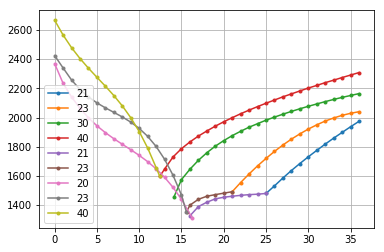

In [4]:
for i in range(len(P_high)):
    plt.plot(data_high[i][:,0],data_high[i][:,1], '.-')
for i in range(len(P_mid)):
    plt.plot(data_mid[i][:,0],data_mid[i][:,1], '.-')
for i in range(len(P_low)):
    plt.plot(data_low[i][:,0],data_low[i][:,1], '.-')

plt.grid()
plt.legend(P_high+P_mid+P_low)

# Low side fit

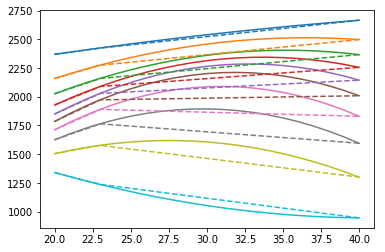

In [5]:
def fit_at_p(dat,k=2):
    fit = interp.UnivariateSpline(dat[:,0],dat[:,1],k=k)
    return fit

fits = [fit_at_p(dat) for dat in data_low]
ps = np.linspace(20,40,21)

for s in np.linspace(0,16,10):
    sp = []
    for f in fits:
        sp.append(f(s))
    fit_p = interp.UnivariateSpline(P_low, sp, k=2)
    plt.plot(ps,fit_p(ps),label=s)
for s in np.linspace(0,16,10):
    sp = []
    for f in fits:
        sp.append(f(s))
    fit_p = interp.UnivariateSpline(P_low, sp, k=1)
    plt.plot(ps,fit_p(ps),'--',label=s)
# plt.legend()
# s = np.linspace(0,17,20)
# plt.plot(dat[:,0],dat[:,1],'.')
# plt.plot(s,fit(s))

# high side fit

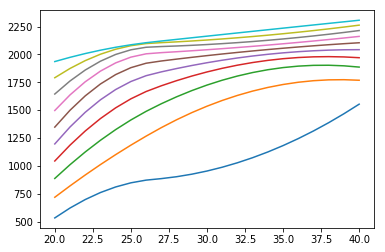

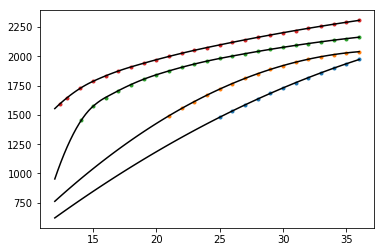

In [6]:
fits = [fit_at_p(dat,k=2) for dat in data_high]
ps = np.linspace(20,40,21)

for s in np.linspace(12,36,10):
    sp = []
    for f in fits:
        sp.append(f(s))
    fit_p = interp.UnivariateSpline(P_high, sp, k=2)
    plt.plot(ps,fit_p(ps),label=s)
ss = np.linspace(12,36,100)  
plt.figure()
for dat,fit in zip(data_high,fits):
    plt.plot(dat[:,0],dat[:,1],'.')
    plt.plot(ss,fit(ss),'k-')

# for s in np.linspace(0,16,10):
#     sp = []
#     for f in fits:
#         sp.append(f(s))
#     fit_p = interp.UnivariateSpline(P_high, sp, k=1)
#     plt.plot(ps,fit_p(ps),'--',label=s)
# plt.legend()

# Mid fit

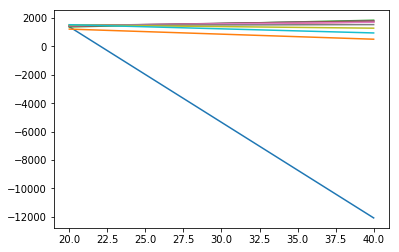

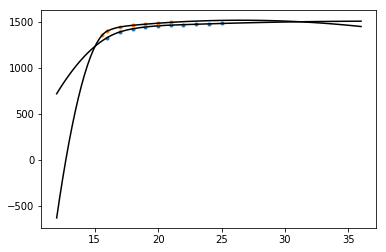

In [7]:
fits = [fit_at_p(dat,k=2) for dat in data_mid]
ps = np.linspace(20,40,21)

for s in np.linspace(12,36,10):
    sp = []
    for f in fits:
        sp.append(f(s))
    fit_p = interp.UnivariateSpline(P_mid, sp, k=1)
    plt.plot(ps,fit_p(ps),label=s)
ss = np.linspace(12,36,100)  
plt.figure()
for dat,fit in zip(data_mid,fits):
    plt.plot(dat[:,0],dat[:,1],'.')
    plt.plot(ss,fit(ss),'k-')

# for s in np.linspace(0,16,10):
#     sp = []
#     for f in fits:
#         sp.append(f(s))
#     fit_p = interp.UnivariateSpline(P_high, sp, k=1)
#     plt.plot(ps,fit_p(ps),'--',label=s)
# plt.legend()

# Eutectic

In [8]:
eutectics = ['eutectic_low.csv','eutectic_high.csv']
eu_dat = []
for file in eutectics:
    df = pd.read_csv(path+file)
    eu_dat.append(np.array(df.values))
eu_low = eu_dat[0]
eu_high = eu_dat[1]

In [9]:
def eu_fun(dat):
    s=dat[:,0]
    p=dat[:,2]
    pf = np.polyfit(s,p,3)
    return lambda s: np.polyval(pf,s)
def eu_funs(eu_dat):
    funs = []
    for dat in eu_dat:
        funs.append(eu_fun(dat))
    return funs
efs = eu_funs(eu_dat)
s = 30
p = 22
def get_T(s, p, eu_funs, fit_funs):    
    if p<eu_funs[0](s):
        T = fit_funs[0](s,p)
    else:
        if p<eu_funs[1](s):
            T = fit_funs[1](s,p)
        else:
            T = fit_funs[2](s,p)
    return T

# Chunked data


In [10]:

chunks = ['liquidus_low.csv',
'liquidus_mid.csv',
'liquidus_high.csv']
chunk_dat = []
for file in chunks:
    df = pd.read_csv(path+file,header=1)
    chunk_dat.append(np.array(df.values))
low_fit_points = chunk_dat[0]
mid_fit_points = chunk_dat[1]
high_fit_points = chunk_dat[2]

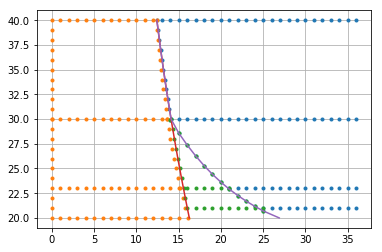

In [11]:
plt.plot(high_fit_points[:,0],high_fit_points[:,2],'.')
plt.plot(low_fit_points[:,0],low_fit_points[:,2],'.')
plt.plot(mid_fit_points[:,0],mid_fit_points[:,2],'.')
plt.plot(eu_low[:,0],eu_low[:,2],'-')
plt.plot(eu_high[:,0],eu_high[:,2],'-')

plt.grid()

## Low Data

In [12]:
x = low_fit_points[:,0]
y = low_fit_points[:,2]
z = low_fit_points[:,1]
# fit_l = interp.SmoothBivariateSpline(x,y,z,kx=3,ky=2, bbox=[0,17,19.5,50],s=50)
w = np.ones(len(low_fit_points))
tx = np.linspace(-3,17,3) # Sulfur Knots
ty = (20,23,40) # Pressure knots
fit_l = interp.LSQBivariateSpline(x,y,z,tx=tx,ty=ty,w=w,kx=3,ky=2)

/usr/local/lib/python3.5/site-packages/scipy/interpolate/fitpack2.py:1101: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=22). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  warnings.warn(message)


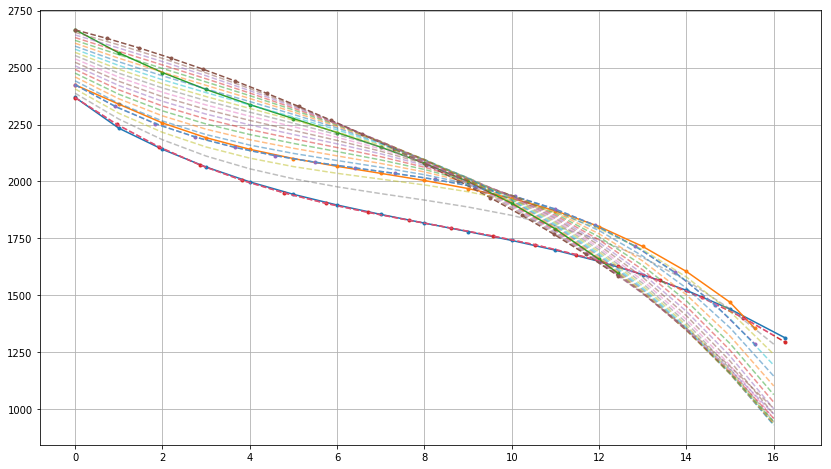

In [13]:
plt.figure(figsize=(14,8))
for i in range(len(P_low)):
    plt.plot(data_low[i][:,0],data_low[i][:,1], '.-')

for i,p in enumerate(P_low):
    s = np.linspace(0,data_low[i][-1,0],18)
    ft = fit_l(s,p)
    plt.plot(s,ft,'.--')

for p in range(20,40):
    s = np.linspace(0,16,17)
    ft = fit_l(s,p)
    plt.plot(s,ft,'--',alpha=0.5)
plt.grid()


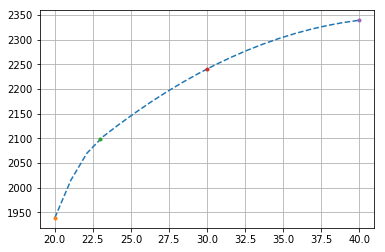

In [14]:
s = 5.
p = np.linspace(20,40,20)
ft =[]
for pp in p:
    ft.append(fit_l(s,pp)[0])
#     ft.append(interp.bisplev(s,pp, tckn))
plt.plot(p,ft,'--')
plt.plot(20,fit_l(s,20)[0], '.')
plt.plot(23,fit_l(s,23)[0], '.')
plt.plot(30,fit_l(s,30)[0], '.')
plt.plot(40,fit_l(s,40)[0], '.')
plt.grid()

## Mid Data

In [15]:
x = mid_fit_points[:,0]
y = mid_fit_points[:,2]
z = mid_fit_points[:,1]
# fit_l = interp.SmoothBivariateSpline(x,y,z,kx=3,ky=2, bbox=[0,17,19.5,50],s=50)
w = np.ones(len(mid_fit_points))
tx = (19,23) # sulfur knots
ty = (21,23,30) # pressure knots
fit_m = interp.LSQBivariateSpline(x,y,z,tx=tx,ty=ty,w=w,kx=3,ky=1)

/usr/local/lib/python3.5/site-packages/scipy/interpolate/fitpack2.py:1101: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=12). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  warnings.warn(message)


(1300, 2000)

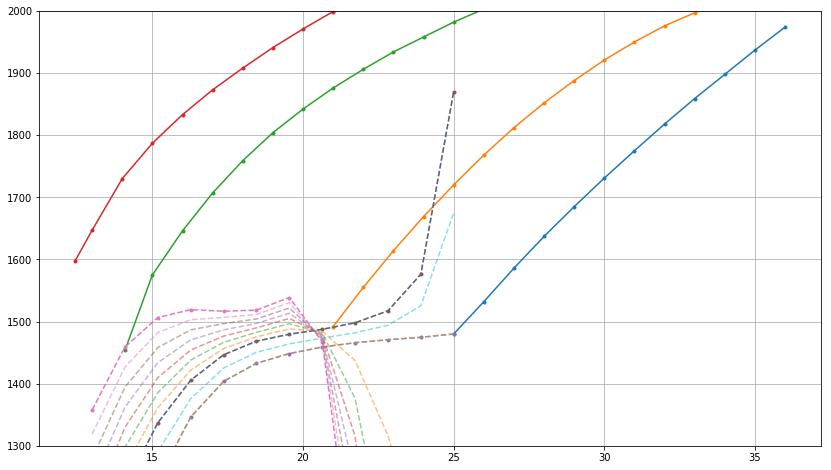

In [16]:
plt.figure(figsize=(14,8))
for i in range(len(P_high)):
    plt.plot(data_high[i][:,0],data_high[i][:,1], '.-')

for i,p in enumerate(P_high):
    s = np.linspace(13,25,12)
    ft = fit_m(s,p)
    plt.plot(s,ft,'.--')

for p in range(21,30):
    s = np.linspace(13,25,12)
    ft = fit_m(s,p)
    plt.plot(s,ft,'--',alpha=0.5)
plt.grid()
plt.ylim(1300,2000)

## High Data

In [17]:
x = high_fit_points[:,0]
y = high_fit_points[:,2]
z = high_fit_points[:,1]
w = np.ones(len(high_fit_points))
tx = np.array([18,25,35]) # sulfur
ty = np.array([23,40]) # pressure
# fit_h = interp.bisplrep(x,y,z, s=1e5, kx=2,ky=2)
fit_h = interp.LSQBivariateSpline(x,y,z,tx=tx,ty=ty,w=w,kx=2,ky=2)

/usr/local/lib/python3.5/site-packages/scipy/interpolate/fitpack2.py:1101: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=7). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  warnings.warn(message)


(1200, 2800)

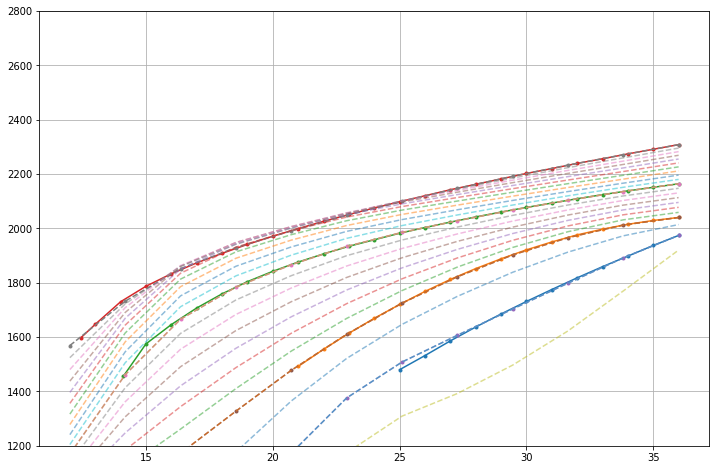

In [18]:
plt.figure(figsize=(12,8))
for i in range(len(P_high)):
    plt.plot(data_high[i][:,0],data_high[i][:,1], '.-')

for i,p in enumerate(P_high):
    s = np.linspace(12,36,12)
    ft = fit_h(s,p)
    plt.plot(s,ft,'.--')

for p in range(20,40):
    s = np.linspace(12,36,12)
    ft = fit_h(s,p)
    plt.plot(s,ft,'--',alpha=0.5)
plt.grid()
plt.ylim(1200,2800)

# Fit all

In [19]:
def liquidus_all(s,p):
    if type(s) is not np.ndarray:
        if type(s) is list:
            s = np.array(s)
        else:
            s = np.array([s])
    if type(p) is not np.ndarray:
        if type(p) is list:
            p = np.array(p)
        else:
            p = np.array([p])
    T = np.empty(s.shape)
    for i,(ss,pp) in enumerate(zip(s,p)):
        if ss<=12.:
            T[i] = fit_l(ss,pp)[0]
        if ss>12. and ss<=14.:
            T[i] = np.max((fit_l(ss,pp)[0],fit_h(ss,pp)[0]))
        elif ss>14. and ss<=16.:
            T[i] = np.max((fit_l(ss,pp)[0],fit_m(ss,pp)[0],fit_h(ss,pp)[0]))
        elif ss>16. and ss<=25.:
            T[i] = np.max((fit_m(ss,pp)[0],fit_h(ss,pp)[0]))
        elif ss>25.:
            T[i] = fit_h(ss,pp)[0]
    return T
fit_funs = [fit_l,fit_m,fit_h];

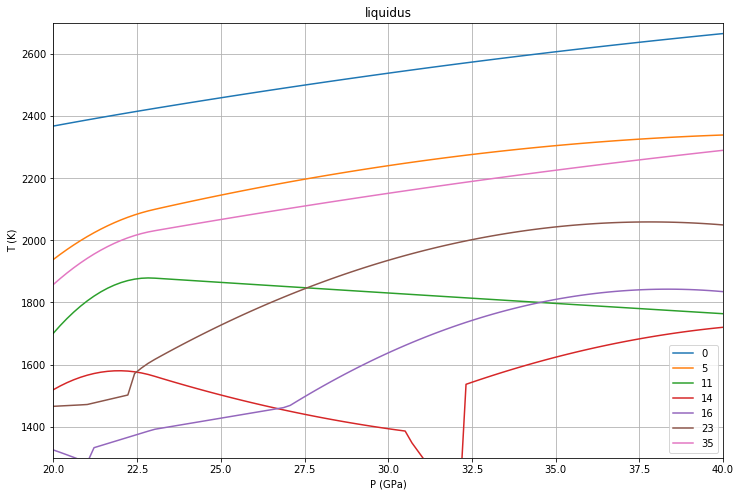

In [21]:
Ss = [0,5,11,14,16,23,35]
plt.figure(figsize=(12,8))
Ps = np.linspace(20,40,100)
Ts = np.zeros_like(Ps)
for s in Ss:
    for i,p in enumerate(Ps):
        Ts[i] =get_T(s,p, efs,fit_funs)
    plt.plot(Ps,Ts,label=s)
plt.legend(loc=0)
Tc = np.linspace(1300,2600,14)
# for T in Tc:
#     Ta = adiaibat(Ps,T)
#     plt.plot(Ps, Ta,'k--',alpha=0.5)    

# Ta = adiaibat(Ps,2200)
# plt.plot(Ps, Ta,'k--')    
# Ta = adiaibat(Ps,2300)
# plt.plot(Ps, Ta,'k--')    
# Ta = adiaibat(Ps,2500)
# plt.plot(Ps, Ta,'k--')    

plt.grid()
plt.title('liquidus')
plt.xlabel('P (GPa)')
plt.ylabel('T (K)')
plt.ylim(1300,2700)
plt.xlim(20,40)
plt.savefig('liquidus_plausible.png')

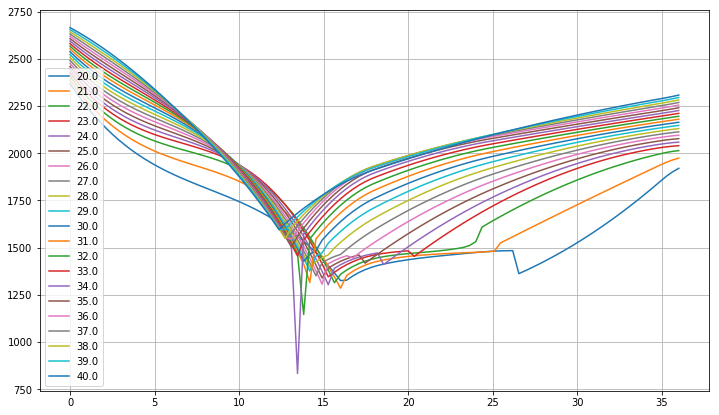

In [22]:
Ss = np.linspace(0,36,100)
Ps = np.linspace(20,40,21)
plt.figure(figsize=(12,7))
T = np.empty((len(Ss),len(Ps)))
for i,p in enumerate(Ps):
    for j,s in enumerate(Ss):
        T[j,i] = get_T(s,p,efs,fit_funs)
    plt.plot(Ss,T[:,i],label=p)
plt.grid()
plt.legend()

(0, 25)

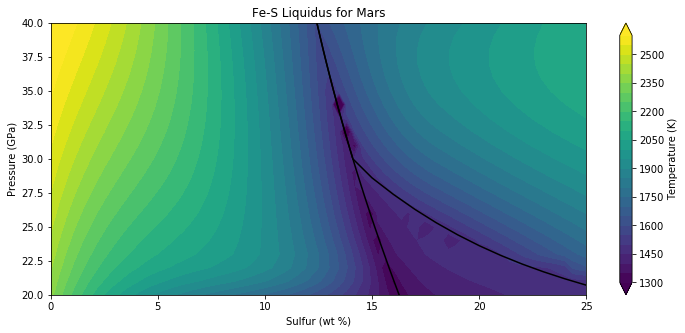

In [23]:
contours = np.linspace(1300,2600,27)
plt.figure(figsize=(12,5))
plt.contourf(Ss,Ps,T.T,contours, cmap=plt.cm.viridis, extend='both')
plt.colorbar(label='Temperature (K)')
plt.ylabel('Pressure (GPa)')
plt.xlabel('Sulfur (wt %)')
plt.title('Fe-S Liquidus for Mars')
plt.plot(eu_low[:,0],eu_low[:,2],'k-')
plt.plot(eu_high[:,0],eu_high[:,2],'k-')
plt.xlim(0,25)

In [24]:
Ss = np.linspace(0,36,100)
Ps = np.linspace(20,40,21)
fit_funs = [fit_l,fit_m,fit_h]
Ts = np.empty((len(Ss),len(Ps)))
for i,s in enumerate(Ss):
    for j,p in enumerate(Ps):
        Ts[i,j] = get_T(s,p,efs,fit_funs)[0]

(0, 23)

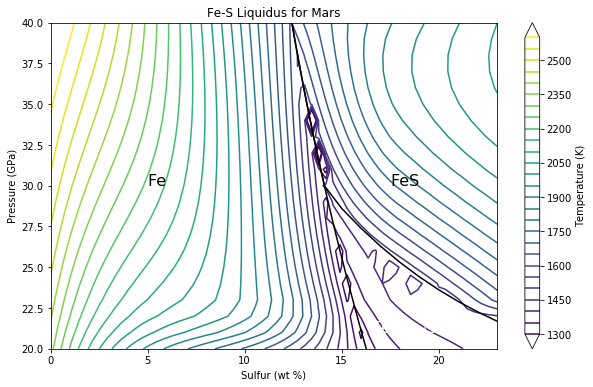

In [25]:
contours = np.linspace(1300,2600,27)
plt.figure(figsize=(10,6))
plt.contour(Ss,Ps,Ts.T,contours, cmap=plt.cm.viridis, extend='both')
plt.colorbar(label='Temperature (K)')
plt.ylabel('Pressure (GPa)')
plt.xlabel('Sulfur (wt %)')
plt.title('Fe-S Liquidus for Mars')
plt.plot(eu_low[:,0],eu_low[:,2],'k-')
plt.plot(eu_high[:,0],eu_high[:,2],'k-')
plt.text(5,30,'Fe',fontsize=16)
plt.text(17.5,30,r'FeS',fontsize=16)
plt.text(16.5,21,r'Fe$_{(3+x)}$S$_2$',fontsize=16,color='w')
plt.xlim(0,23)